<a href="https://colab.research.google.com/github/wjunior15/kaggle_titanic/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Kaggle Challange Titanic
Criar um modelo de predição para prever quem sobreviveria ou não ao acidente do Titanic
 - Tratar os dados faltantes e outliers
 - Escolher o modelo adequado de predição

##Bibliotecas importadas aqui

In [ ]:
import pandas as pd
import numpy as np

##Datasets importados aqui

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Dados Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train.query("Survived == 1")['Age'].value_counts()

24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
         ..
80.00     1
7.00      1
32.50     1
12.00     1
0.67      1
Name: Age, Length: 65, dtype: int64

##Validando se há dados duplicados no df

In [ ]:
train = train.drop_duplicates()
train.describe()
##Não há nenhum dado duplicado

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
891-714
##dados de idade faltantes

177

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##Função que transforma os dados do sexo do passageiro de string para int

In [ ]:
def trata_sexo(dados):

  list_sex = []

##1 para homens e 0 para mulheres
  for i in range(len(dados)):

    if dados['Sex'].iloc[i] == 'male':
      list_sex.append(1)
    else:
      list_sex.append(0)
  return list_sex

###Adicionando a coluna de valores numéricos para genero ao df

In [ ]:
train['Sex_number'] = trata_sexo(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


##Função que trata os dados do local de embarque de string para int

In [ ]:
def trata_embarque(dados):

  list_embarked = []

##0 -> S
##1 -> C
##2 -> Q
  for i in range(len(dados)):

    if dados['Embarked'].iloc[i] == 'S':
      list_embarked.append(0)
    elif dados['Embarked'].iloc[i] == 'C':
      list_embarked.append(1)
    else:
      list_embarked.append(2)
  return list_embarked

###Adicionando a coluna numérica ao df

In [ ]:
train['Embarked_number'] = trata_embarque(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_number,Embarked_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [ ]:
##Conferindo os valores mudados
train['Embarked_number'].value_counts()

0    644
1    168
2     79
Name: Embarked_number, dtype: int64

##Reduzindo as colunas do DF apenas para os dados que serão utilizados para a análise

In [ ]:
train = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_number', 'Embarked_number']]
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_number,Embarked_number
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,0


In [ ]:
##Resumo estatistico dos dados
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_number,Embarked_number
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.365881
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.640157
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_number,Embarked_number
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,0


##Função que trata os dados de idade faltantes, gerando vários datasets que podem substituir os valores faltantes com média, mediana e média por sexo

In [ ]:
##media de idade por sexo
dados_gerais = int(train['Age'].mean())
dados_homens = int(train.query("Sex_number == 1")['Age'].mean())
dados_mulheres = int(train.query("Sex_number == 0")['Age'].mean())
print('Geral:{}\nHomens:{}\nMulheres:{}'.format(dados_gerais, dados_homens, dados_mulheres))

Geral:29
Homens:30
Mulheres:27


In [ ]:
def fillna_age(dados, homens, mulheres):
  data_1 = dados['Age'].fillna(int(dados['Age'].mean()))
  data_2 = dados['Age'].fillna(dados['Age'].median())
  
  for i in range(len(dados)):
    if pd.isnull(dados['Age'].iloc[i]):
      if dados['Sex_number'].iloc[i] == 1:
        dados['Age'].iloc[i] = homens
      else:
        dados['Age'].iloc[i] = mulheres 

  return data_1, data_2, dados['Age']

##Criando 3 lista de valores de idades usando a função fillna

In [ ]:
dado_1, dado_2, dado_3 = fillna_age(train, dados_homens, dados_mulheres)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dado_1.head(15)#fillna usando a media

In [ ]:
dado_2.head(15)#fillna usando a mediana

In [ ]:
dado_3.head(15)#usando media por sexo

#Resumo dos dados de treino:
##Survived -> 0
##Age média = 29 anos
##A maioria dos passageiros era homem

##df.copy() usado para fazer uma cópia sem modificar o df original
## df_2 = df_1 modifica o df_1 quando algo é alterado no df_2

In [ ]:
train_media = train.copy()
train_media['Age'] = dado_1
train_media.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_number,Embarked_number
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208,0.647587,0.365881
std,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429,0.477990,0.640157
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


##Dados de idade dos sobreviventes e boxplot para analise da distribuição de idades

In [ ]:
train.query("Survived == 1")['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

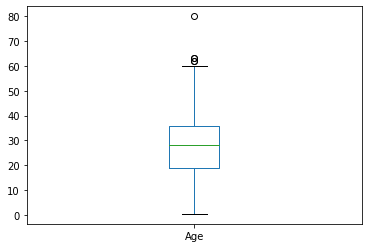

In [ ]:
train.query("Survived == 1")['Age'].plot.box()

In [ ]:
train.query("Survived == 0")['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

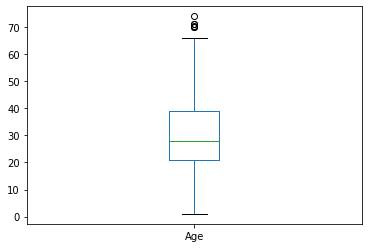

In [ ]:
train.query("Survived == 0")['Age'].plot.box()

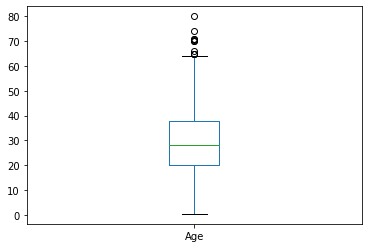

In [ ]:
train['Age'].plot.box()

##Função para preencher a média com o valor médio por sexo

In [ ]:
##remover
def media_por_idade(dados, dados_mulheres, dados_homens):
  for i in range(len(dados)):
    if np.isnan(dados['Age'].iloc[i]):
      if dados['Sex_number'].iloc[i] == 1:
        dados['Age'].iloc[i] = dados_homens
      else:
        dados['Age'].iloc[i] = dados_mulheres
  return dados

In [ ]:
train_media_sex = train.copy()
train_media_sex['Age'] = dado_3
train_media_sex.head(8)

##Dados para analise de qual é a melhor opção para substituir os valores NaN para idade 

In [ ]:
train_media['Age'].describe()

In [ ]:
train_media_sex['Age'].describe()

In [ ]:
train['Age'].describe()

##Analise de idade média de acordo com as váriaveis SibSp e Parch

In [ ]:
values_sibsp = train['SibSp'].value_counts()
values_sibsp.sort_index

<bound method Series.sort_index of 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64>

In [ ]:
train['Parch'].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

##Função que retorna a média de idade referente aos valores de SibSp

In [ ]:
def media_SibSp(dados):
  values_sibsp = dados['SibSp'].value_counts()
  lista = []
  for i in values_sibsp.index:
    var = int(dados.query("SibSp == @i")['Age'].mean())
    linha = [i, var]
    lista.append(linha)

  return lista

In [ ]:
dados_SibSp = train_media_sex.copy()
media_idade_sibsp = media_SibSp(dados_SibSp)

print(media_idade_sibsp)

[[0, 30], [1, 29], [2, 23], [4, 7], [3, 17], [8, 28], [5, 10]]


In [ ]:
def media_por_sibsp(dado_1, dado_2):

  for i in range(len(dado_1)):
    if np.isnan(dado_1['Age'].iloc[i]):
      valor_SibSp = dado_1['SibSp'].iloc[i]
      for j in range(len(dado_2)):
        if dado_2[j][0] == valor_SibSp:
          dado_1['Age'].iloc[i] = dado_2[j][1]
  
  return dado_1

In [ ]:
media_sibsp_train = train.copy()
media_sibsp_train = media_por_sibsp(media_sibsp_train, media_idade_sibsp)
media_sibsp_train['Age'].describe()

In [ ]:
train['Age'].describe()

##Agora vamos analisar as idades médias levando em conta o valor de Parch
###Vão ser utilizadas as mesmas funções que as do SibSp mudando apenas a váriavel analisada

In [ ]:
def media_parch(dados):
  values_sibsp = dados['Parch'].value_counts()
  lista = []
  for i in values_sibsp.index:
    var = int(dados.query("Parch == @i")['Age'].mean())
    linha = [i, var]
    lista.append(linha)

  return lista

In [ ]:
dados_Parch = train_media_sex.copy()
media_idade_parch = media_parch(dados_Parch)

print(media_idade_parch)

[[0, 31], [1, 24], [2, 18], [5, 39], [3, 33], [4, 44], [6, 43]]


In [ ]:
def media_por_parch(dado_1, dado_2):

  for i in range(len(dado_1)):
    if np.isnan(dado_1['Age'].iloc[i]):
      valor_Parch = dado_1['Parch'].iloc[i]
      for j in range(len(dado_2)):
        if dado_2[j][0] == valor_Parch:
          dado_1['Age'].iloc[i] = dado_2[j][1]
  
  return dado_1

In [ ]:
media_parch_train = train.copy()
media_parch_train = media_por_sibsp(media_parch_train, media_idade_parch)
media_parch_train['Age'].describe()

In [ ]:
train['Age'].describe()

In [ ]:
media_sibsp_train['Age'].describe()

In [ ]:
train.describe()

##Função genérica para gerar médias de idade levando em conta duas variáveis
OBS: apenas gera o valor médio, não preencher nenhum valor nulo no ds

In [ ]:
def gera_medias(dados, coluna_1, coluna_2):
  lista_medias = []
  coluna_1_values = dados[coluna_1].value_counts()
  coluna_2_values = dados[coluna_2].value_counts()
  for j in coluna_1_values.index:
    for i in coluna_2_values.index:
      media = dados.query("{} == @j and {} == @i".format(coluna_1, coluna_2))['Age'].mean()
      tamanho_grupo = len(dados.query("{} == @j and {} == @i".format(coluna_1, coluna_2)))
      if not(np.isnan(media)): media = int(media)
      lista_medias.append({'value_c1':j, 'value_c2':i, 'media': media, 'tamanho_amostra':tamanho_grupo})
  return lista_medias

In [ ]:
gera_medias(train_media_sex, 'Sex_number', 'SibSp')

[{'media': 31, 'tamanho_amostra': 434, 'value_c1': 1, 'value_c2': 0},
 {'media': 29, 'tamanho_amostra': 103, 'value_c1': 1, 'value_c2': 1},
 {'media': 28, 'tamanho_amostra': 15, 'value_c1': 1, 'value_c2': 2},
 {'media': 6, 'tamanho_amostra': 12, 'value_c1': 1, 'value_c2': 4},
 {'media': 13, 'tamanho_amostra': 5, 'value_c1': 1, 'value_c2': 3},
 {'media': 30, 'tamanho_amostra': 4, 'value_c1': 1, 'value_c2': 8},
 {'media': 8, 'tamanho_amostra': 4, 'value_c1': 1, 'value_c2': 5},
 {'media': 28, 'tamanho_amostra': 174, 'value_c1': 0, 'value_c2': 0},
 {'media': 30, 'tamanho_amostra': 106, 'value_c1': 0, 'value_c2': 1},
 {'media': 17, 'tamanho_amostra': 13, 'value_c1': 0, 'value_c2': 2},
 {'media': 8, 'tamanho_amostra': 6, 'value_c1': 0, 'value_c2': 4},
 {'media': 19, 'tamanho_amostra': 11, 'value_c1': 0, 'value_c2': 3},
 {'media': 27, 'tamanho_amostra': 3, 'value_c1': 0, 'value_c2': 8},
 {'media': 16, 'tamanho_amostra': 1, 'value_c1': 0, 'value_c2': 5}]

In [ ]:
train_mediana = train.copy()
train_mediana['Age'] = dado_2

##Fazer as divisões dos dados em treino e teste para que seja possível tirar alguma métrica antes de enviar os dados

In [ ]:
train.head()

##Dados preenchidos com média global de idade

In [ ]:
X_media = train_media.iloc[:, 1:]
Y_media = train_media.iloc[:, 0]

In [ ]:
##Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_media_train, X_media_test, Y_media_train, Y_media_test = train_test_split(X_media, Y_media, test_size = 0.3)

In [ ]:
##Criando e treinando o modelo
from sklearn.linear_model import LogisticRegression

model_media = LogisticRegression().fit(X_media_train, Y_media_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
Y_media_predict = model_media.predict(X_media_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_media_test, Y_media_predict)

0.7985074626865671

##Dados preenchidos com mediana global de idade

In [ ]:
X_mediana = train_mediana.iloc[:, 1:]
Y_mediana = train_mediana.iloc[:, 0]

In [ ]:
X_mediana_train, X_mediana_test, Y_mediana_train, Y_mediana_test = train_test_split(X_mediana, Y_mediana, test_size = 0.3)

In [ ]:
model_mediana = LogisticRegression().fit(X_mediana_train, Y_mediana_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
Y_mediana_predict = model_mediana.predict(X_mediana_test)

In [ ]:
accuracy_score(Y_mediana_test, Y_mediana_predict)

0.7574626865671642

##Dados preenchidos com media de idade de acordo com sexo

In [ ]:
X_media_sexo = train_media_sex.iloc[:, 1:]
Y_media_sexo = train_media_sex.iloc[:, 0]

X_sexo_train, X_sexo_test, Y_sexo_train, Y_sexo_test = train_test_split(X_media_sexo, Y_media_sexo, test_size = 0.3)

In [ ]:
model_sexo = LogisticRegression().fit(X_sexo_train, Y_sexo_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
Y_sexo_predict = model_sexo.predict(X_sexo_test)
accuracy_score(Y_sexo_test, Y_sexo_predict)

0.8097014925373134

##Importando dados de test

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/Dados Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
test['Sex_number'] = trata_sexo(test)
test['Embarked_number'] = trata_embarque(test)

test.drop(columns = ['Sex', 'Embarked'], inplace = True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_number,Embarked_number
0,3,34.5,0,0,7.8292,1,2
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,1,2
3,3,27.0,0,0,8.6625,1,0
4,3,22.0,1,1,12.2875,0,0


In [ ]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_number,Embarked_number
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.636364,0.464115
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.685516
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,2.000000


In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [ ]:
dados_homens_test = int(train.query("Sex_number == 1")['Age'].mean())
dados_mulheres_test = int(train.query("Sex_number == 0")['Age'].mean())

In [ ]:
test = media_por_idade(test, dados_mulheres_test, dados_homens_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
test_predict = model_sexo.predict(test)

In [ ]:
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
test_submit = pd.read_csv('/content/drive/MyDrive/Datasets/Dados Titanic/test.csv')

In [ ]:
test_submit['Survived'] = test_predict

In [ ]:
test_submit[['PassengerId', 'Survived']].to_csv('kaggle_titanic_submit_1.csv', index=False)